# Some Notes

#### This is the fifth kaggle survey for 2021
- this notebook contain some analysis about the questions and visualization about it to handel the data analysis and get the knowledge about the data
- it contain 42 questions 
- we will find some relation and analysis between the data features

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
df = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

#### Data shape and columns
- Data Contain 25973 columns and 369 rows

In [ ]:
df.shape

#### Drop the second row that contain the description of questions

In [ ]:
df = df.drop(0)

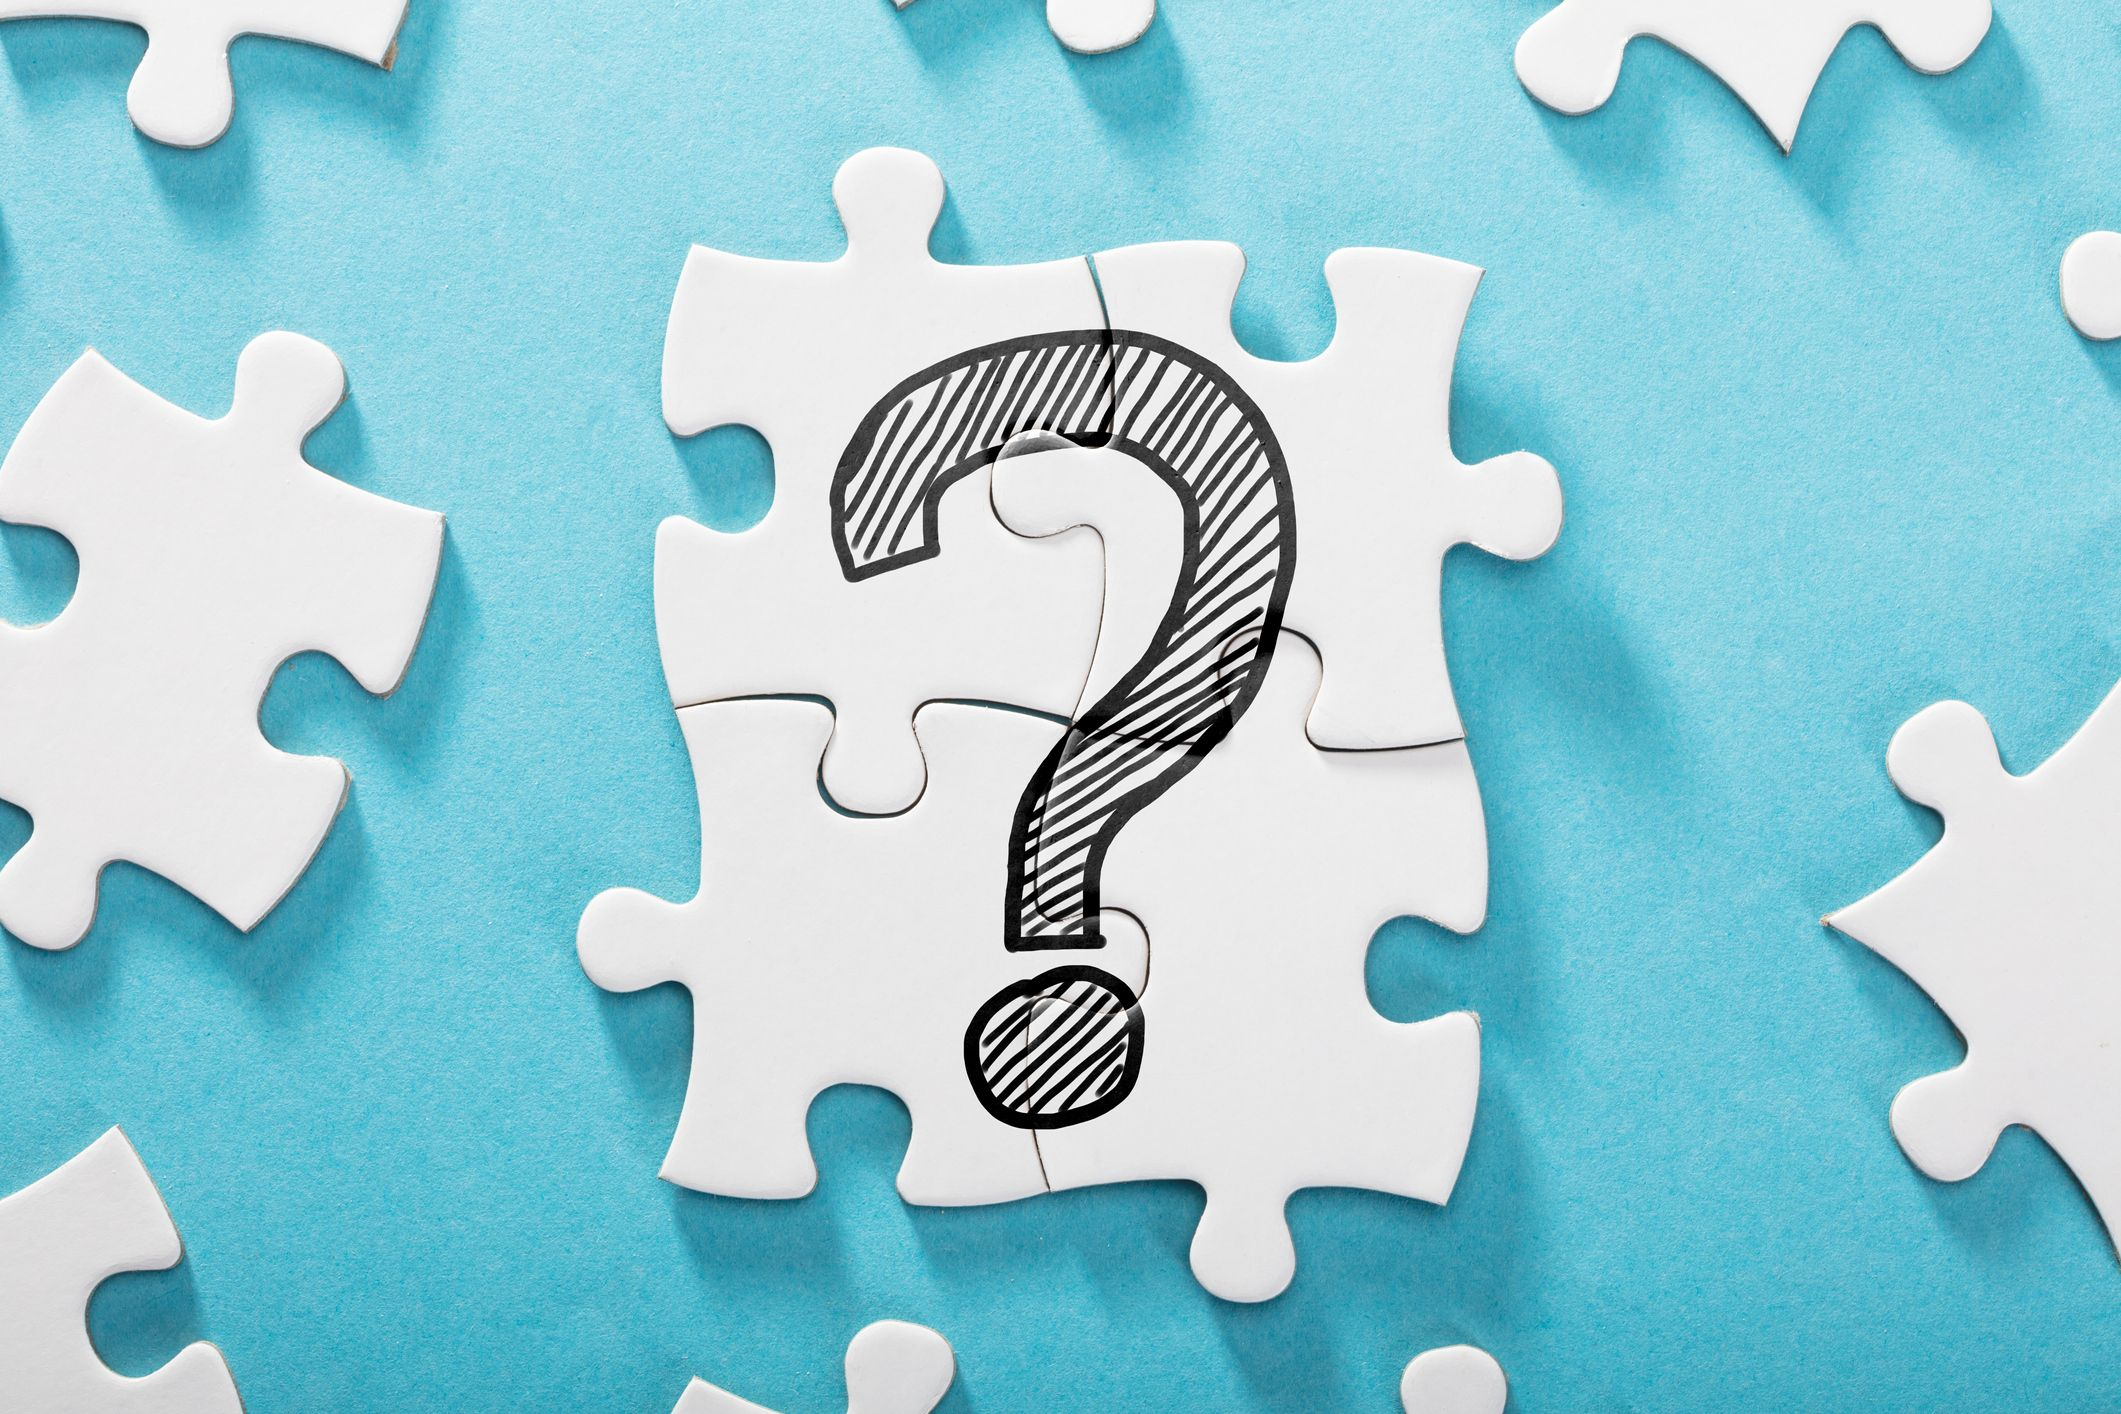

# Here we will take the first 6 questions 
- Q1 : What is your age (# years)?
- Q2 : What is your gender? - Selected Choice
- Q3 : In which country do you currently reside?
- Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
- Q5 : Select the title most similar to your current role (or most recent title if retired): - Selected Choice
- Q6 : For how many years have you been writing code and/or programming?

#### What is your age (# years)?

In [ ]:
df = df.rename(columns = {"Time from Start to Finish (seconds)": "SurveyDuration"}, inplace = False)

In [ ]:
df['SurveyDuration'] = df['SurveyDuration'].astype(int)

In [ ]:
df['SurveyDuration'].isnull().sum()

In [ ]:
df['SurveyDuration'].describe()

In [ ]:
df['SurveyDuration'] = df['SurveyDuration']/60

In [ ]:
df.head(2)

In [ ]:
import plotly.express as px
sns.distplot(df['SurveyDuration'], color = 'blue')
plt.title('Survey Duration')

In [ ]:
df.loc[df['SurveyDuration'] >= 50]

In [ ]:
df = df.loc[df['SurveyDuration'] <= 200]

In [ ]:
sns.distplot(df['SurveyDuration'], color = 'blue')
plt.title('Survey Duration')

In [ ]:
df['SurveyDuration'].describe()

#### Relationship between Survey Duration , Gender and Country

In [ ]:
fig = px.scatter(df, x="SurveyDuration", y="Q3",color="Q2")
fig.show()

In [ ]:
df.shape

# Some Personal Data 
- Age
- Gender
- Country
- Education
- Level
- Years Of Experience

and some data to be analyzed

#### Q1 :   What is your gender? - Selected Choice

In [ ]:
df = df.rename(columns = {"Q1": "Age"}, inplace = False)

In [ ]:
df['Age'].value_counts()

In [ ]:
df['Age'] = df['Age'].astype('category')

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='Age',data=df,  palette='pastel')

#### Q2 : What is your gender? - Selected Choice

In [ ]:
df = df.rename(columns = {"Q2": "Gender"}, inplace = False)

In [ ]:
df['Gender'].isnull().sum()

In [ ]:
df['Gender'].value_counts()

In [ ]:
(df['Gender'].value_counts() / df['Gender'].value_counts().sum()) * 100

#### we have five categories but the high tw categories are 
- man with 79.392338
- woman with 18.750250

and the other 3 categories have no effect in the dataset

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='Gender',data=df.head(500),  palette='pastel')

In [ ]:
df1 = df.tail(20)
fig = px.sunburst(df1, path=["Gender",'Age'],
                  color='SurveyDuration', hover_data=['Q3'],
                  color_continuous_scale='RdBu')
fig.show()

In [ ]:
df['Gender'].value_counts()

In [ ]:
df = df.loc[df['Gender'] != 'Prefer not to say']
df = df.loc[df['Gender'] != 'Nonbinary']
df = df.loc[df['Gender'] != 'Prefer to self-describe']

In [ ]:
df1 = df.tail(200)
fig = px.sunburst(df1, path=["Gender",'Age'],
                  color='SurveyDuration', hover_data=['Q3'],
                  color_continuous_scale='RdBu')
fig.show()

#### Q3 : In which country do you currently reside?

In [ ]:
df['Q3'].head()

In [ ]:
df = df.rename(columns = {"Q3": "Country"}, inplace = False)

In [ ]:
df['Country'].isnull().sum()

In [ ]:
df['Country'].value_counts()

In [ ]:
df2 = df.tail(20)
fig = px.sunburst(df2, path=["Country",'Age'],
                  color='SurveyDuration', hover_data=['Country'],
                  color_continuous_scale='RdBu')
fig.show()

#### We can find here that ' India' is the biggest country that contain 7197 vs United States of America that contain 2513 in the second rank 
- in another step we can make a quick comparison between the population for each country 

In [ ]:
Values = (df['Country'].value_counts() / df['Country'].value_counts().sum()) * 100

In [ ]:
Values.argsort()

In [ ]:
df['Country'].value_counts()

In [ ]:
Trial = df.Country.value_counts()
Trial.head(10).plot(kind='pie')

In [ ]:
countplt, ax = plt.subplots(figsize = (40,21))
ax =sns.countplot(y='Country',data=df.head(50).head(500),  palette='pastel')

#### Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [ ]:
df.shape

In [ ]:
df['Q4'].head()

In [ ]:
df['Q4'].value_counts()

In [ ]:
df["Q4"].replace({"Some college/university study without earning a bachelor’s degree": "Undergraduate"}, inplace=True)

In [ ]:
df = df.rename(columns = {"Q4": "Education"}, inplace = False)

In [ ]:
df['Education'].isnull().sum()

In [ ]:
df2 = df.tail(20)
fig = px.sunburst(df2, path=["Country",'Education'],
                  color='Country', hover_data=['Gender'],
                  color_continuous_scale='RdBu')
fig.show()

In [ ]:
df2 = df.tail(500)
fig = px.sunburst(df2, path=["Gender",'Education'])
fig.show()

In [ ]:
df.shape

#### Q5 : Select the title most similar to your current role (or most recent title if retired): - Selected Choice

In [ ]:
df['Q5'].head()

In [ ]:
df = df.rename(columns = {"Q5": "JobTitle"}, inplace = False)

In [ ]:
df['JobTitle'].value_counts()

In [ ]:
df3 = df.tail(500)
fig = px.scatter_3d(df3, x="JobTitle", y="Country", z="Education",color = "Gender")
fig.show()

In [ ]:
df2 = df.tail(20)
fig = px.sunburst(df2, path=["Gender",'JobTitle'],
                  color='JobTitle', hover_data=['Country'],
                  color_continuous_scale='RdBu')
fig.show()

In [ ]:
df2 = df.tail(20)
fig = px.sunburst(df2, path=["Country",'JobTitle'],
                  color_continuous_scale='RdBu')
fig.show()

#### Q6 : For how many years have you been writing code and/or programming?

In [ ]:
df['Q6'].value_counts()

In [ ]:
df = df.rename(columns = {"Q6": "YearsOfExperiecne"}, inplace = False)

In [ ]:
df2 = df.head(20)
fig = px.sunburst(df2, path=["YearsOfExperiecne",'Country'],
                  color_continuous_scale='RdBu')
fig.show()

In [ ]:
df2 = df.tail(20)
fig = px.sunburst(df2, path=["JobTitle",'Country'],
                  color='YearsOfExperiecne', hover_data=['Gender'],
                  color_continuous_scale='RdBu')
fig.show()

In [ ]:
df['SurveyDuration'].value_counts()

In [ ]:
df2 = df.sort_values(by=['SurveyDuration'])
df2= df2.head(200)
fig=px.bar(df2,x='Gender', y="Age", animation_frame="JobTitle", 
           animation_group="Country", color="Country", hover_name="Gender")
fig.update_layout(title='Hob Titles And Time')

In [ ]:
df2 = df.sort_values(by=['SurveyDuration'])
df2= df2.head(200)
fig=px.bar(df2,x='Education', y="JobTitle", animation_frame="JobTitle", 
           animation_group="Country", color="Country", hover_name="Gender")
fig.update_layout(title='Hob Titles And Time')

In [ ]:
import plotly.express as px
fig = px.bar(df, x='SurveyDuration', y='Country')
fig.show()

In [ ]:
df['Country'].value_counts()

In [ ]:
import plotly.express as px
fig = px.bar(df, x='JobTitle', y='Country')
fig.show()

In [ ]:
df.to_csv('csv_to_submit.csv', index = False)